# Tracy Michaels

## CSC 4740 Data Mining - Assignment 4

### Classification


##### Data given in assignment:

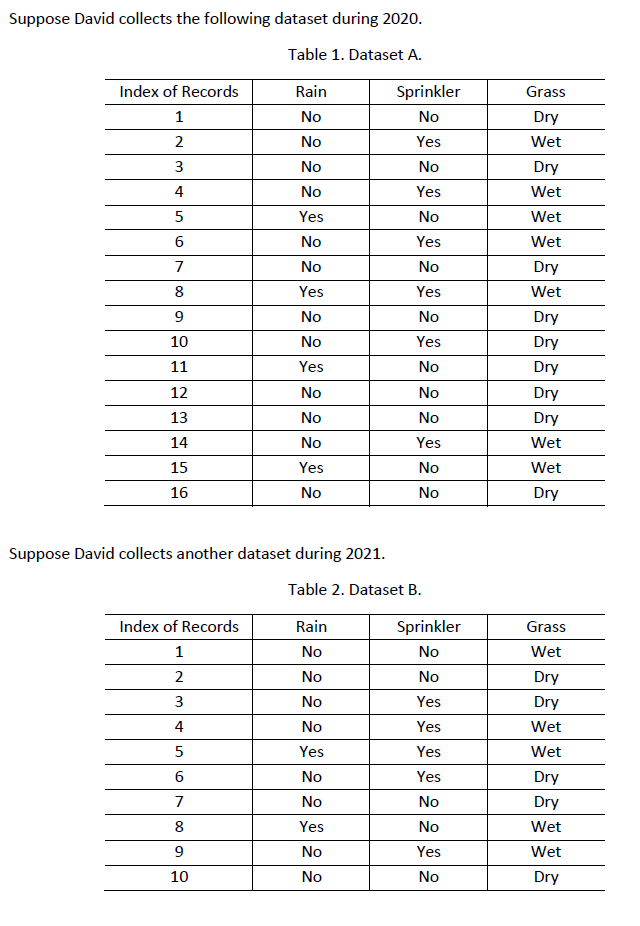

#### (pre-pro):
### Decision tree

<p>Decision tree is a akin to a flowchart where each non-leaf node is a test attribute and each leaf node is a class label.  When presented with a tuple of information with unknown class, a path is traced from the root node to a leaf node, which determines the class prediction for that tuple. </p> 

#### Decision tree induction:

<p>The first step during tree construction is attribute selection.  Attribute selection measures are used to select the attribute that best partitions the tuples into distinct classes. Sometimes it is necessary to prune the tree to account for noise or outliers in the training data if any exist. This will attempt to identify and remove any branch that reflects noise to improve accuracy of the tree.  </p>

#### Attribute selection measure (information gain):

<p>Attribute selection measues are a hueristic for selecting the splitting criterion that best separates a given data partition of the training tuples into individual classes.  One method of attribute selection is called information gain, like what is used in ID3.  Information gain allows for multiway splits, meaning that the tree could be non-binary.  In information gain the attribute which has the minimal information needed to classify the tuples in resulting partitions and reflects the least imputiry or randomness is selected as the splitting attribute. The expected information need to classify a tuple in a dataset <i>D</i> is given by (Eq1):</p>

> $ \textit{Info}(D)=-\sum_{i=1}^m p_{i}log_{2}(p_i) $  

where $ p_i $ is the nonzero probability that an arbitrary tuple in $D$ belongs to calss $C_i$ and is estimated by |$C_{i,D}$|/|$D$|. a log function of base 2 is used as the information is encoded in binary. $Info(D)$, also known as the entropy of $D$, the average amount of information needed to identify the class label of a tuple in $D$, which is based on the proportions of tuples of each class.  

Then, partitioning the tuples in $D$ on some attribute $A$ having $v$ distinct values. Attribute $A$ can be used to split $D$ into $v$ partitions, $\{D_1, D_2,..., D_v\}$, where $D_j$ contains those tuples in $D$ that have outcome $a_j$ of $A$. These partitions correspond to the branches grown from node $N$.  Considering that it is likely each partition would be impure, to determine how much more informaion would be needed still after partitioning to arrive at a classificaion is measured by(Eq2):  

> $ \textit{Info}_A(D)=\sum_{j=1}^v\frac{|D_j|}{|D|} x \textit{Info}(D_j) $  

where $\frac{|D_j|}{|D|}$ is a weight of the <i>j</i>th partition, $ \textit{Info}_A(D)$ is the expected information required to classify a tuple from $D$ based on partitioning by $A$.  Information gain is therefore defined as the difference between the origional information requirement based on the proportion of calsses and the new requirement obtained after partitioning on $A$.  This is to say Eq3:  

> $\textit{Gain}(A) = \textit{Info}{D} - \textit{Info}_A(D)$  

which tells how much would be gained by branching on $A$, the attribute with the highest gain is then selected as the splitting attribute at node $N$


## Problem 1 solution:   
### Using informaion gain illustrate how to train a decision tree from Dataset A in Table 1:  

in this dataset, the class is defined by the Grass attribute.  There are two distinct values, Dry and Wet in which to classify the data, meaning there are two distinct classes.  There are 9 Dry tuples and 7 Wet tuples. Therefore expected information needed to classify a tuple in the dataset is computed Eq1: 

> $ \textit{Info}(D)=-\frac{9}{16}log_{2}(\frac{9}{16}) - \frac{7}{16}log_{2}(\frac{7}{16}) = 0.9887 bits$    

next is to compute the expected informatin requirement for each attribute, Rain and Sprinkler.  Examing the distribution of Dry and Wet for each attribute. In Rain, for Yes, there are 3 Wet tuples and 1 Dry tuple, for No, there are 4 Wet tuples and 8 No tuples. In Sprinkler, for Yes, there are 5 Wet tuples and 1 Dry tuple, for No, there are 2 Wet tuples and 8 Dry tuples. So to calculate the expected information requirement needed to classify a tuple in $D$ if the tuple is partitioned according to each attribute using Eq2 and Gain calculated from Eq3:  

> $\textit{Info}_{Rain}(D)=\frac{4}{16}(-\frac{3}{4}log_{2}(\frac{3}{4})-\frac{1}{4}log_{2}(\frac{1}{4}))+\frac{12}{16}(-\frac{4}{12}log_{2}(\frac{4}{12})-\frac{8}{12}log_{2}(\frac{8}{12}))= 0.8915 bits$  
>  
> $\therefore Gain(Rain) = 0.9887 - 0.8915 = 0.0972 bits$

> $\textit{Info}_{Sprinkler}(D)=\frac{6}{16}(-\frac{5}{6}log_{2}(\frac{5}{6})-\frac{1}{5}log_{2}(\frac{1}{5}))+\frac{10}{16}(-\frac{2}{10}log_{2}(\frac{2}{10})-\frac{8}{10}log_{2}(\frac{8}{10})) = 0.7075 bits$  
>  
> $\therefore Gain(Strinkler) = 0.9887 - 0.7075 = 0.2812 bits$

Since Sprinkler has the highest information gain of the attributes it is therefore selected as the splitting attribute for node $N$ and the tuples are then partitioned accordingly for each value of attribute Sprinkler.  Since all tuples in each partition are not represented by only one class these steps will then be repeated until there can no longer be further splits.  



iterative resulting tree represented as following tables (Root node Sprinkler, branches Yes/No): 

| Sprinkler || Yes | 


| Index | Rain | Grass |
| --- | --- | --- |
| 2 | No |  Wet |
| 4 | No |  Wet |
| 6 | No |  Wet |
| 8 | Yes |  Wet |
| 10 | No |  Dry |
| 14 | No |  Wet |  

| Sprinkler || No | 

| Index | Rain | Grass |
| --- | --- | --- |
| 1 | No | Dry |
| 3 | No | Dry |
| 5 | Yes | Wet |
| 7 | No | Dry |
| 9 | No | Dry |
| 11 | Yes | Dry |
| 12 | No | Dry |
| 13 | No | Dry |
| 15 | Yes | Wet |
| 16 | No | Dry |  


Before continuing the recursive tree building algorithm, it might be wise to perform some tree pre-pruning 

#### Pruning:  

There could be outliers or noise in the data and one way to combat that is to prune the tree of branches that could lead to overfitting the data.  This is a statistical method to remove the least-reliable branches.  One method of pruning is pre-pruning where a branch is halted from making further branches and is instead turned into a leaf.  To decide whether to pre-prune a branch can be done by examine if the most frequent class among the tuples is present by more than a specified threshold.  For this example the threshold will be set to 85%.  Examining the branches, Sprinkler - Yes is represented by Wet by more than 85%, so it will be converted to a leaf node.  Sprinkler - No is represented by Wet by only 80% so it will be proceed to the next interation of the recursive step tree build  

#### Continuing information gain algorigthm:  

Since there is only one attribute left the algorithm has no choice but to select that attribute to perform the branching.  

resulting tables of the tree:  

| Sprinkler || Yes | 


| Index | Rain | Grass |
| --- | --- | --- |
| 2 | No |  Wet |
| 4 | No |  Wet |
| 6 | No |  Wet |
| 8 | Yes |  Wet |
| 10 | No |  Dry |
| 14 | No |  Wet |  

| Sprinkler || No | 

| Index | Rain | Grass |
| --- | --- | --- |
| 1 | No | Dry |
| 3 | No | Dry |
| 5 | Yes | Wet |
| 7 | No | Dry |
| 9 | No | Dry |
| 11 | Yes | Dry |
| 12 | No | Dry |
| 13 | No | Dry |
| 15 | Yes | Wet |
| 16 | No | Dry |  

| Sprinkler || No |
| Rain || Yes | 

| Index | Grass |
| --- | --- |
| 5 | Wet |
| 11 | Dry |
| 15 | Wet |  


| Sprinkler || No |
| Rain || No |  

| Index | Grass |
| --- | --- |
| 1 | No | Dry |
| 3 | No | Dry |
| 7 | No | Dry |
| 9 | No | Dry |
| 12 | No | Dry |
| 13 | No | Dry |
| 16 | No | Dry |  


From the resulting tables it is apparent that Sprinkler - No, Rain - No, will be turned into a Dry leaf node as it is represented by only one class.  However, in the case of Sprinkler - No, Rain - Yes, it is not represented by only one class and it is impossible to branch it further as there are no more attributes.  Since this could be due to outliers or noise, it will be set to the class that is most represented

### Using python and Scikit-learn to illustrate and visualize this process:  

In [1]:
import pandas as pd
import numpy as np
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics 


# loading training data into dataframe
cols_a = ['Rain', 'Sprinkler', 'Grass']
dataset_a = [['No', 'No', 'Dry'],
            ['No', 'Yes', 'Wet'],
            ['No', 'No', 'Dry'],
            ['No', 'Yes', 'Wet'],
            ['Yes', 'No', 'Wet'],
            ['No', 'Yes', 'Wet'],
            ['No', 'No', 'Dry'],
            ['Yes', 'Yes', 'Wet'],
            ['No', 'No', 'Dry'],
            ['No', 'Yes', 'Dry'],
            ['Yes', 'No', 'Dry'],
            ['No', 'No', 'Dry'],
            ['No', 'No', 'Dry'],
            ['No', 'Yes', 'Wet'],
            ['Yes', 'No', 'Wet'],
            ['No', 'No', 'Dry']]

# loading test data into dataframe
cols_b = cols_a
dataset_b = [['No', 'No', 'Wet'],
            ['No', 'No', 'Dry'],
            ['No', 'Yes', 'Dry'],
            ['No', 'Yes', 'Wet'],
            ['Yes', 'Yes', 'Wet'],
            ['No', 'Yes', 'Dry'],
            ['No', 'No', 'Dry'],
            ['Yes', 'No', 'Wet'],
            ['No', 'Yes', 'Wet'],
            ['No', 'No', 'Dry']]

df_1_train = pd.DataFrame(dataset_a, columns=cols_a )
df_1_train.index += 1

df_2_test = pd.DataFrame(dataset_b, columns=cols_b)
df_2_test.index += 1

display(df_1_train)
display(df_2_test)

,Rain,Sprinkler,Grass
1,No,No,Dry
2,No,Yes,Wet
3,No,No,Dry
4,No,Yes,Wet
5,Yes,No,Wet
6,No,Yes,Wet
7,No,No,Dry
8,Yes,Yes,Wet
9,No,No,Dry
10,No,Yes,Dry


,Rain,Sprinkler,Grass
1,No,No,Wet
2,No,No,Dry
3,No,Yes,Dry
4,No,Yes,Wet
5,Yes,Yes,Wet
6,No,Yes,Dry
7,No,No,Dry
8,Yes,No,Wet
9,No,Yes,Wet
10,No,No,Dry


In [2]:
# splitting dataset into X features and y labels
# and converting to numerical intrepertation
X_train = df_1_train.copy()
X_train.Grass = X_train.Grass.map({'Wet': 0, 'Dry': 1})
X_train.Rain = X_train.Rain.map({'No': 0, 'Yes': 1})
X_train.Sprinkler = X_train.Sprinkler.map({'No': 0, 'Yes': 1})
y_train = X_train.Grass.copy()

# display(X_train)
# display(y_train)

In [3]:
#build decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy',  min_weight_fraction_leaf=1-0.85)

#train classifier
clf = clf.fit(X_train.loc[:, X_train.columns != 'Grass'], y_train)

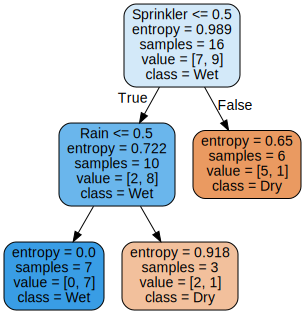

In [4]:
#visualizing tree
# display(tree.plot_tree(clf, feature_names=['Rain', 'Sprinkler'], class_names=['Dry', 'Wet']))
display(graphviz.Source(export_graphviz(clf, feature_names=['Rain', 'Sprinkler'],\
                                        class_names=['Dry', 'Wet'], filled=True,\
                                       rounded=True)))

## Problem 2 solution:  
### Testing model for accuracy and constructing confusion matrix:  

Using the following formulas to compute the various accuracy values:

accuracy:
> $\frac{TP+TN}{P+N}$ 

Error rate: 
> $\frac{FP+FN}{P+N}$  

Sensitivity: 
> $\frac{TP}{P}$ 

Specificity: 
> $\frac{TN}{N}$ 

Precision: 
> $\frac{TP}{TP+FP}$ 

Recall (Binary): 
>  $\frac{TP}{TP+FN}$  

F-score: 
>  $\frac{2\times precision \times recall}{precision + recall}$  

where: 
 - $P$ is the number of positive tuples
 - $N$ is the number of negative tuples
 - True positives ($TP$) are the positive tuples that were correctly labeled by the classifier 
 - True negatives ($TN$) are the negative tuples that were correctly labeled by the classifier
 - False positives ($FP$) are the negative tuples that were incorrectly labeled as positive 
 - False Negatives ($FN$) are the positive tuples that were mislabeled as negative 
 
 
first step is to test the data in Table 2. Dataset B

In [5]:
# convert binary data to numerical representation 
X_test = df_2_test.copy()
X_test.Grass = X_test.Grass.map({'Wet': 0, 'Dry': 1})
X_test.Rain = X_test.Rain.map({'No': 0, 'Yes': 1})
X_test.Sprinkler = X_test.Sprinkler.map({'No': 0, 'Yes': 1})
y_test = X_test.Grass.copy()

# using decision tree to predict values 
y_pred = clf.predict(X_test.loc[:, X_test.columns != 'Grass'])

# construct confustion matrix based prediction (this will be used to get true/false positives/negatives)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
# display(conf_matrix)

P, N = y_test.value_counts()
TN, FP, FN, TP = conf_matrix.ravel()
# display([TP, TN, FP, FN])

# calculating values
accuracy = (TP+TN)/(P+N)

err_rate = (FP+FN)/(P+N)

sensitivity = (TP)/(P)

specificity = (TN)/(N)

precision = (TP)/(TP+FP)

# same for binary
recall = sensitivity

f_score = (2*precision*recall)/(precision+recall)

print(f'   Accuracy: {accuracy}')
print(f' Error rate: {err_rate}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
print(f'  Precision: {precision}')
print(f'     Recall: {recall}')
print(f'    F-score: {f_score}')

   Accuracy: 0.7
 Error rate: 0.3
Sensitivity: 0.6
Specificity: 0.8
  Precision: 0.75
     Recall: 0.6
    F-score: 0.6666666666666665


## Problem 3 Solution: 
### Using naïve Bayesian classifier to make predictions:  

#### Bayes' Theorem: 

letting $\textbf{X}$ be a data tuple, $\textbf{X}$ is considered 'evidence', described by measurements made on a set of $\textit{n}$ attributes.  Letting $H$ be some hypothesis such that $\textbf{X}$ belongs to a specified class $\textit{C}$.  The goal is to determine $P(H|\textbf{X})$, which is the probability of $H$, given evidence $\textbf{X}$. Bayes' theorem states that Eq4: 
> $P(H|\textbf{X}) = \frac{P(\textbf{X}|H)P(H)}{P(\textbf{X})}$ 

#### Naïve Bayesian Classification: 

in order to predict if a given tuple $\textbf{X}$ belongs to the class $C_i$ with the highest posterior porbability condiditon on $\textbf{X}$, it is necessary to maximize $P(C_i|\textbf{X})$ so long as $P(C_i|\textbf{X})$ > $P(C_j|\textbf{X})$ for $1 \le j \le m(num\_classes), j \ne i$. This is performed by Bayes' theorem Eq4:  
>  $P(C_i|\textbf{X})=\frac{P(\textbf{X}|C_i)P(C_i)}{P(\textbf{X})}$  

with nïve assumption that there are no attribute values that are conditionally independent of each other given the class label of the tuple.  Therefore it is easier to compute the expimate probabilities of each $x_n$ given $C_i$ via Eq5: 
>  $P(\textbf{X}|C_i)=\prod_{k=1}^{n}P(x_k|C_i) = P(x_1|C_i)\times P(x_2|C_i)\times...\times P(x_n|C_i)$

so to predict the class label of $\textbf{X}$, $P(\textbf{X}|C_i)P(C_j)$ is evaluated for each class $C_i$. The classifier predicts that the class label of tuple $\textbf{X}$ is the class $C_i$ if and only if: 
>  $P(C_j|\textbf{X})$ for $1 \le j \le m, j \ne i$  

meaning that the predicted class label is $C_i$ for which $P(\textbf{X}|C_i)P(C_i)$ is maximal.  

##### predicting the label "Grass" for the tuple (“Rain” = “No”, “Sprinkler” = “Yes”, and “Grass” = “Wet”) from Dataset B: 

the prior probability of each class based on the training dataset is: 
> $P(Grass=Dry)=\frac{9}{16}= 0.5625$  
> $P(Grass=Wet)=\frac{7}{16}= 0.4375$  


computing conditional probabilities $P(\textbf{X}|C_i)$ of the training dataset:  
>  $P(Rain=No|Grass=Dry)=\frac{8}{9}= 0.8889$  
>  $P(Rain=No|Grass=Wet)=\frac{4}{7}= 0.5714$  
>  $P(Sprinkler=Yes|Grass=Dry)=\frac{1}{9}= 0.1111$  
>  $P(Sprinkler=Yes|Grass=Wet)=\frac{5}{7}= 0.7143$  

using these probabilities:  
>  $P(\textbf{X}|Grass=Dry) = 0.8889 \times 0.1111 = 0.0988$  
>  $P(\textbf{X}|Grass=Wet) = 0.5714 \times 0.7143 = 0.4082$  

finding the class, $C_i$, that maximizes $P(\textbf{X}|C_i)P(C_i)$, is computed by:  
>  $P(\textbf{X}|Grass=Dry)P(Grass=Dry) = 0.0988 \times 0.5625 = 0.0556$  
>  $P(\textbf{X}|Grass=Wet)P(Grass=Wet) = 0.4082 \times 0.4375 = 0.1786$  

$\therefore$ since Grass=Wet is maximal, naïve Bayesian Classifier predicts Grass=Wet for the tuple in fourth record in Dataset B.  This claim is evidenced by the fact that the input tuple states the expected outcome should be Grass=Wet, meaning the prediction was accurate  

#### using python to further illustrate:  

In [6]:
# gaussian seems to be the most popular 
from sklearn.naive_bayes import GaussianNB 

GNB = GaussianNB()

#train
GNB.fit(X_train.loc[:, X_train.columns != 'Grass'], y_train)

#predict
pred = GNB.predict([X_test.loc[4, X_test.columns != 'Grass']])
pred = pd.Series(pred, name='Grass').map({0:'Wet', 1:'Dry'})
display(pred) # wet:0, dry:1

0    Wet
Name: Grass, dtype: object

## Problem 4 Solution:  
#### Bayesian Belief Network:  

as opposed to naïve Bayesian classifier, Bayesian Belief network allows for dependencies between variables. A Bayesian belief network consists of two components, a directed non-cyclic graph and a set of conditonal probability tables.  Each node of the graph represents a variable, and each edge drawn from one node to another represents a probabilstics dependence such that an edge from node X to node Y, X is the parent or immediate predecessor of Y, and Y is the decendant of X and each  variable is conditionally independent of its nondecendants.  For each variable, there exists one conditional probability table.  The conditional probability for a variable or node Y specifies the conditional distribution $P(Y|Parents(Y))$, where $Parents(Y)$ are the parent nodes of Y.  Given a data tuple $\textbf{X}=(x_1,...,x_n)$ described by attributes $Y_1,...,Y_n$, respectively, allows the network to provide a complete representation of the existing joint probability distribution with the following equation Eq6:  
>  $P(x_1,...,x_n)=\prod_{i=1}^{n}P(x_i|Parents(Y_i))$  

where $P(x_1,...,x_n)$ is the probability of a particular combination of values of $\textbf{X}$, and the values for $P(x_i|Parents(Y_i))$ correspond to the entries in the conditional probability table.  

The class label attribute is selected as the output node within the network.


#### Construction and training of Bayesian Belief Networks:  

The topology of the network can be constructed by domain experts or inferred from the data.  In this example the topology is given in the following directed graph:  

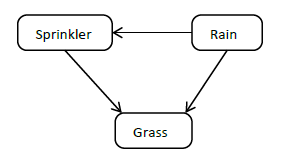  

since the topology is known and the variables are not hidden, training the network is straightforward as all that is needed to be done is to compute the entries in the conditional probability tables which is similar to computing the probabilities incolved in naïve Bayesian classification.  

computing table for $P(Rain)$:  
>  $P(Rain=No) = \frac{12}{16} = 0.75$  
>  $P(Rain=Yes) = \frac{4}{16} = 0.25$  

Giving a conditional probability table of:  
> |Yes|No|
> | --- | --- |
> |0.75|0.25|  

Computing table for $P(Sprinkler|Rain)$:  
> $P(Sprinkler=Yes|Rain=Yes) = \frac{1}{4} = 0.250$  
> $P(Sprinkler=Yes|Rain=No) = \frac{5}{12} = 0.417$ 
> $P(Sprinkler=No|Rain=Yes) = \frac{3}{4} = 0.750$  
> $P(Sprinkler=No|Rain=No) = \frac{7}{12} = 0.583$ 

Giving a condidtional probability table of:  

> |Rain|Yes|No|
> | --- | --- | --- | 
> |Yes|0.250|0.750| 
> |No|0.417|0.583|  

Computing table for $P(Grass|Rain, Sprinkler)$: 
> $P(Grass=Wet|Rain=Yes, Sprinkler=Yes) = \frac{1}{1} = 1.000$  
> $P(Grass=Wet|Rain=Yes, Sprinkler=No) = \frac{2}{3} = 0.667$  
> $P(Grass=Wet|Rain=No, Sprinkler=Yes) = \frac{4}{5} = 0.800$  
> $P(Grass=Wet|Rain=No, Sprinkler=No) = \frac{0}{7} = 0.000$  
> $P(Grass=Dry|Rain=Yes, Sprinkler=Yes) = \frac{0}{1} = 0.000$  
> $P(Grass=Dry|Rain=Yes, Sprinkler=No) = \frac{1}{3} = 0.333$  
> $P(Grass=Dry|Rain=No, Sprinkler=Yes) = \frac{1}{5} = 0.200$  
> $P(Grass=Dry|Rain=No, Sprinkler=No) = \frac{7}{7} = 1.000$  

Giving a conditional probability table of:  
> |Sprinkler|Rain|Wet|Dry|
> | --- | --- | --- | --- |
> |Yes|Yes|1.000|0.000|  
> |Yes|No|0.667|0.333|  
> |No|Yes|0.800|0.200|  
> |No|No|0.000|1.000|  
